In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
dataset = pd.read_csv("Cleaned-Telco-Dataset.csv")
dataset

,Unnamed: 0,TotalCharges,tenure,MonthlyCharges,MultipleLines_No phone service,SeniorCitizen,Contract_One year,PaymentMethod_Credit card (automatic),InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Mailed check,Contract_Two year,Churn,OnlineSecurity_Yes,TechSupport_Yes
0,0,29.85,1,29.85,1,0,0,0,0,0,0,0,0,0,0
1,1,1889.50,34,56.95,0,0,1,0,0,0,1,0,0,1,0
2,2,108.15,2,53.85,0,0,0,0,0,0,1,0,1,1,0
3,3,1840.75,45,42.30,1,0,1,0,0,1,0,0,0,1,1
4,4,151.65,2,70.70,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1990.50,24,84.80,0,0,1,0,0,0,1,0,0,1,1
7039,7039,7362.90,72,103.20,0,0,1,1,0,0,0,0,0,0,0
7040,7040,346.45,11,29.60,1,0,0,0,0,0,0,0,0,1,0
7041,7041,306.60,4,74.40,0,1,0,0,0,0,1,0,1,0,0


In [118]:
dataset.shape

(7043, 15)

In [119]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# scale_cols = ['TotalCharges','tenure','MonthlyCharges']
# # now we scling all the data 
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# dataset[scale_cols] = scale.fit_transform(dataset[scale_cols])

In [120]:
X = dataset.drop('Churn', axis = 1)
y = dataset['Churn']

In [121]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [122]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [123]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 14))
# classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [124]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [125]:
classifier.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 6)                 90        
                                                                 
 dense_26 (Dense)            (None, 6)                 42        
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________


In [126]:
X_train.shape, y_train.shape

((5634, 14), (5634,))

In [127]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.2, batch_size = 10, epochs = 100)

Epoch 1/100
451/451 [==============================] - 2s 3ms/step - loss: 0.5649 - accuracy: 0.7258 - val_loss: 0.5151 - val_accuracy: 0.7453
Epoch 2/100
451/451 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.7351 - val_loss: 0.4779 - val_accuracy: 0.7737
Epoch 3/100
451/451 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7635 - val_loss: 0.4583 - val_accuracy: 0.7879
Epoch 4/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7724 - val_loss: 0.4464 - val_accuracy: 0.7897
Epoch 5/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4614 - accuracy: 0.7777 - val_loss: 0.4379 - val_accuracy: 0.7950
Epoch 6/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4549 - accuracy: 0.7790 - val_loss: 0.4323 - val_accuracy: 0.8004
Epoch 7/100
451/451 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.7806 - val_loss: 0.4283 - val_accuracy: 0.7941

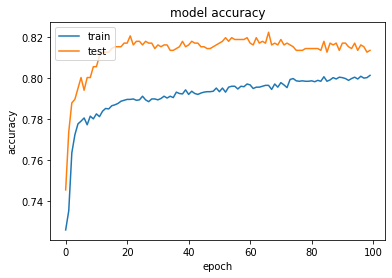

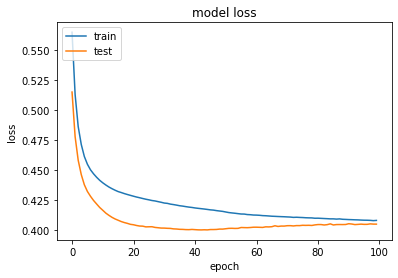

In [128]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [129]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [130]:
y_pred_ann = y_pred

In [131]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [132]:
cm

array([[922, 119],
       [171, 197]])

In [133]:
score

0.794180269694819

In [134]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, classification_report,roc_auc_score
def evaluation(X_test, clf, y_test):
  y_pred = clf.predict(X_test)
  print('CLASSIFICATION REPORT')
  print(classification_report(y_test, y_pred))
      
  print('F1-Score')
  print(np.round(f1_score(y_test, y_pred)*100,2))
    
  print('Accuracy')
  accuracy = accuracy_score(y_test, y_pred)
  print(np.round(accuracy*100, 2), '%')

def plot_loss(model):
  prob=model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds=roc_curve(y_test, prob)
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  #plt.title('Logistic Regression ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  print('AUC-ROC')
  print(np.round(roc_auc_score(y_test, prob)*100,2))

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.49      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409

F1-Score
54.27
Accuracy
78.35 %
AUC-ROC
82.7


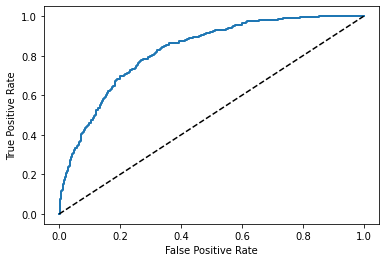

In [135]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(learning_rate = 0.3, n_estimators = 180, max_depth = 3)
xgb_clf.fit(X_train, y_train)
evaluation(X_test, xgb_clf, y_test)
plot_loss(xgb_clf)

In [136]:
xgb_clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.49      0.55       368

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

F1-Score
55.49
Accuracy
79.28 %
AUC-ROC
81.68


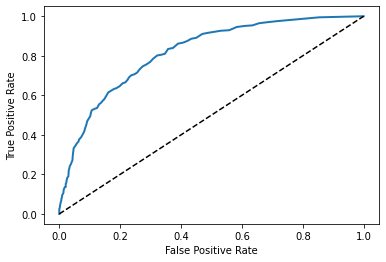

In [137]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
evaluation(X_test, rfc, y_test)
plot_loss(rfc)

In [153]:
xg_boost_preds = xgb_clf.predict(X_test)
random_forest_preds = rfc.predict(X_test)
ann_preds = y_pred_ann
acctual_preds = y_test

In [178]:
predictions_count = len(acctual_preds)

xg_boost_preds_converted = [xg_boost_preds[i] for i in range(predictions_count)]
random_forest_preds_converted = [random_forest_preds[i] for i in range(predictions_count)]
ann_preds_converted = [ 1 if ann_preds[i][0] else 0 for i in range(predictions_count)]

xg_boost_weight = 0.2
random_forest_weight = 0.3
ann_preds_weight = 0.5

ensemble_preds = []
for i in range(predictions_count):
  current_pred_dict = {1:0, 0:0}
  current_pred_dict[xg_boost_preds_converted[i]] += xg_boost_weight
  current_pred_dict[random_forest_preds_converted[i]] += random_forest_weight
  current_pred_dict[ann_preds_converted[i]] += ann_preds_weight
  ensemble_preds.append(max(current_pred_dict, key=current_pred_dict.get))


In [179]:
acctual_preds

2200    0
4627    0
3225    0
2828    0
3768    0
       ..
2631    1
5333    1
6972    1
4598    0
3065    0
Name: Churn, Length: 1409, dtype: int64

In [180]:
# for row in acctual_preds.array:
#     print(row)
print('CLASSIFICATION REPORT')
print(classification_report(acctual_preds, ensemble_preds))
    
print('F1-Score')
print(np.round(f1_score(acctual_preds, ensemble_preds)*100,2))
  
print('Accuracy')
accuracy = accuracy_score(acctual_preds, ensemble_preds)
print(np.round(accuracy*100, 2), '%')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1041
           1       0.60      0.57      0.59       368

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409

F1-Score
58.54
Accuracy
78.99 %
